# Lesson 3: Basic Python for Data Analytics (Stocks Prediction)

# Introduction of Pandas


pandas is a DataFrame Framework, a library that stores data in a highly efficient spreadsheet format and functions.
Efficient in:
1. Data Structure (numpy)
2. Computing time (since DataFrame is processed by C++, it runs in a well streamlined computing environment)
3. Highly optimized and updated processes


[For more details of numpy](https://en.wikipedia.org/wiki/NumPy)

[For more details of pandas cookbook and 10 minutes basic](http://pandas.pydata.org/pandas-docs/stable/10min.html)

## Objective

* To use pandas to load the latest updated data from Yahoo Finance
* To explore and understand the dataset 
    * Viewing the data
    * Correlation Analysis
    * Graphing using matplotlib
* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)
* Comparing models and discuss improvements
* Challenges:
    * Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
    * Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
    * Cleaning out the data
    * Importing data files
* Next lesson:
    * Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)

## Loading YahooFinance Dataset

In this demonstration, we will use pandas web data reader. This is an extension of pandas library to communicate with most updated financial data. 

This will include sources as:
* Yahoo! Finance
* Google Finance
* Enigma
* FRED
* Fama/French
* World Bank
* OECD
* Eurostat
* EDGAR Index
* TSP Fund Data
* Oanda currency historical rate
* Nasdaq Trader Symbol Definitions

[For more details of pandas webreader](https://pandas-datareader.readthedocs.io/en/latest/)  

In [1]:
import sys
print (sys.prefix)

/home/amigx/.pyenv/versions/anaconda3-5.3.1


In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002
2019-09-05,213.970001,211.509995,212.000000,213.279999,23913700.0,213.279999
2019-09-06,214.419998,212.509995,214.050003,213.259995,19350800.0,213.259995


Get the dimension of dataframe

In [3]:
df.shape

(2436, 6)

## Exploring the data 

First we will need to explore the data.
This means understanding the stocks data trend thoroughly by finding key measures
* rolling mean (moving average) -- to determine trend
* return deviation -- to determine return deviation

[For more details of rolling mean](http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp) 


In [4]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2019-08-23    197.960657
2019-08-26    198.086917
2019-08-27    198.186503
2019-08-28    198.286788
2019-08-29    198.391109
2019-08-30    198.498685
2019-09-03    198.564745
2019-09-04    198.682279
2019-09-05    198.841507
2019-09-06    198.996962
Name: Adj Close, dtype: float64

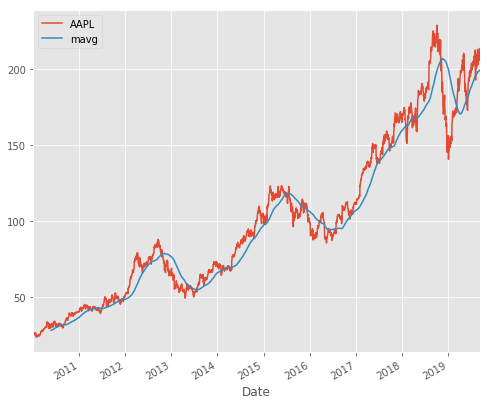

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: Adj Close, dtype: float64

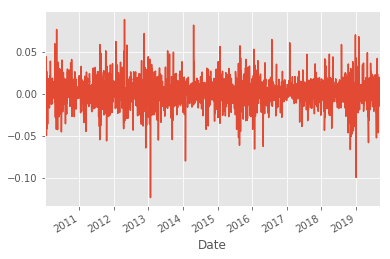

In [7]:
rets.plot(label='return')

## Doing the competitor analysis/Correlation

1. How does one company perform in relative with its competitor
2. What are the correlations among these companies

In [8]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-08-30,208.740005,8.25,1188.099976,135.529999,137.860001
2019-09-03,205.699997,8.33,1168.390015,134.100006,136.039993
2019-09-04,209.190002,8.80,1181.410034,136.320007,137.630005
2019-09-05,213.279999,8.81,1211.380005,140.970001,140.050003
2019-09-06,213.259995,8.71,1204.930054,140.570007,139.100006


Get the dimension of dataframes

In [9]:
dfcomp.shape

(2436, 5)

In [10]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.321280,0.463624,0.386921,0.458291
GE,0.321280,1.000000,0.332088,0.437627,0.361763
GOOG,0.463624,0.332088,1.000000,0.407711,0.539266
IBM,0.386921,0.437627,0.407711,1.000000,0.492707
MSFT,0.458291,0.361763,0.539266,0.492707,1.000000


Text(0,0.5,'Returns GE')

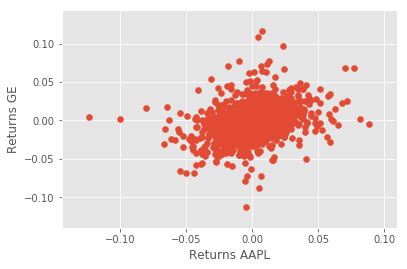

In [11]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

You can do scatter matrix with all the competitors data and find the kde of each m
KDE will determine if your chart is more normally distributed leaning to the 
* left: Returns are more likely to be negative in the long run
* centre: Returns are more likely to be 0 in the long run
* right: Returns are more likely to be positive in the long run

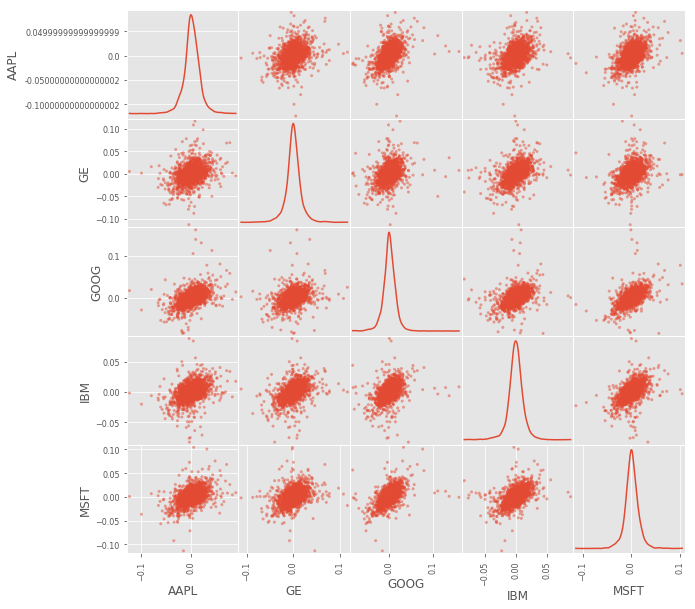

In [12]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

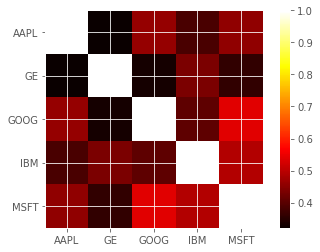

In [13]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## Stocks mean and Risk calculation
Which stocks are risky and bearing returns

Kurtosis and skewness

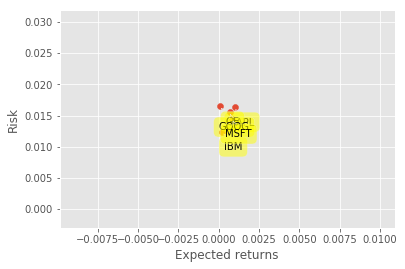

In [14]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting the stocks price

To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [15]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.681330
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.727465
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.302330
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.253704
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.428249


In [16]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,26.681330,123432400.0,0.990606,0.271752
2010-01-05,26.727465,150476200.0,1.091520,-0.102519
2010-01-06,26.302330,138040000.0,2.123523,-1.590633
2010-01-07,26.253704,119282800.0,1.400893,-0.552538
2010-01-08,26.428249,111902700.0,1.386924,0.798864


In [17]:
import math
import numpy as np

from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(2436, 4)
Dimension of X (2411, 4)
Dimension of y (2411,)


In [18]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

## Build the model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

## Test the model

In [20]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.9672185897304492
The quadratic regression 2 confidence is  0.9680879406660958
The quadratic regression 3 confidence is  0.9689100534351923
The knn regression confidence is  0.941867154249188


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times. 

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind. 

We need to plot out the graph to make the most sense of it 

# Plotting the Prediction

In [21]:
# Printing the forecast
def show_forecast(clf, confidence):
    forecast_set = clf.predict(X_lately)
    dfreg['Forecast'] = np.nan
    print(forecast_set, confidence, forecast_out)
    return forecast_set
    
forecast_set = show_forecast(clfreg, confidencereg)
#forecast_set = show_forecast(clfpoly2, confidencepoly2)
#forecast_set = show_forecast(clfpoly3, confidencepoly3)
#forecast_set = show_forecast(clfknn, confidenceknn)

[203.02018392 192.46805207 196.33625289 198.38190965 202.77026171
 201.27893848 200.80833393 208.4022806  202.61993066 202.02287872
 206.46272723 210.32218878 210.26965547 212.61098627 212.47711569
 202.57064986 206.49378799 204.43136372 205.87804168 209.11620358
 208.90850198 205.96937225 209.32471777 213.13743924 213.28470026] 0.9672185897304492 25


In [22]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

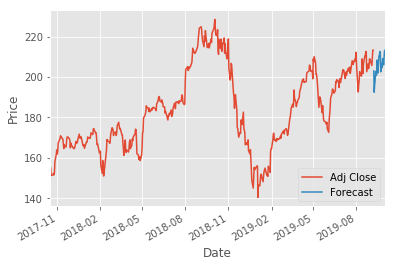

In [23]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()